In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
from Funciones import * 

In [2]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'

In [3]:
datos = pd.read_csv(ruta_datos+'Datos.csv', index_col=0, parse_dates=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

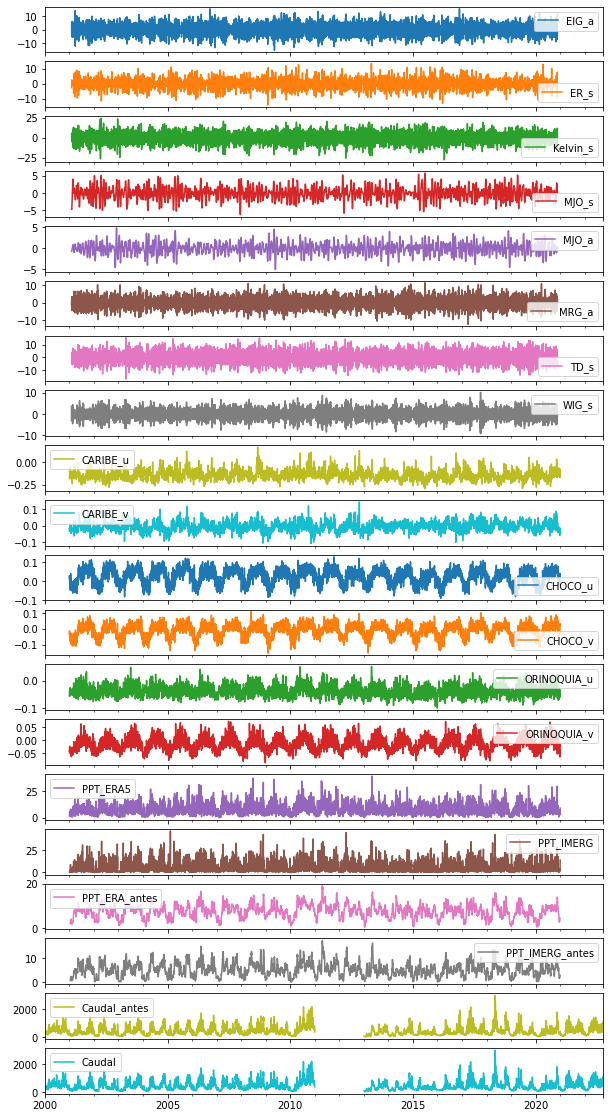

In [4]:
datos.plot(subplots=True, figsize=(10,20))

### Climatologías

In [5]:
media_climatologica = datos.groupby([datos.index.month, datos.index.day]).mean()
# arreglar el 29 de febrero
media_climatologica.loc[2, 29, :] = (media_climatologica.loc[2, 28, :].values+media_climatologica.loc[3, 1, :].values)/2

In [6]:
media_climatologica.to_csv(ruta_datos+'Media_clima_datos.csv')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

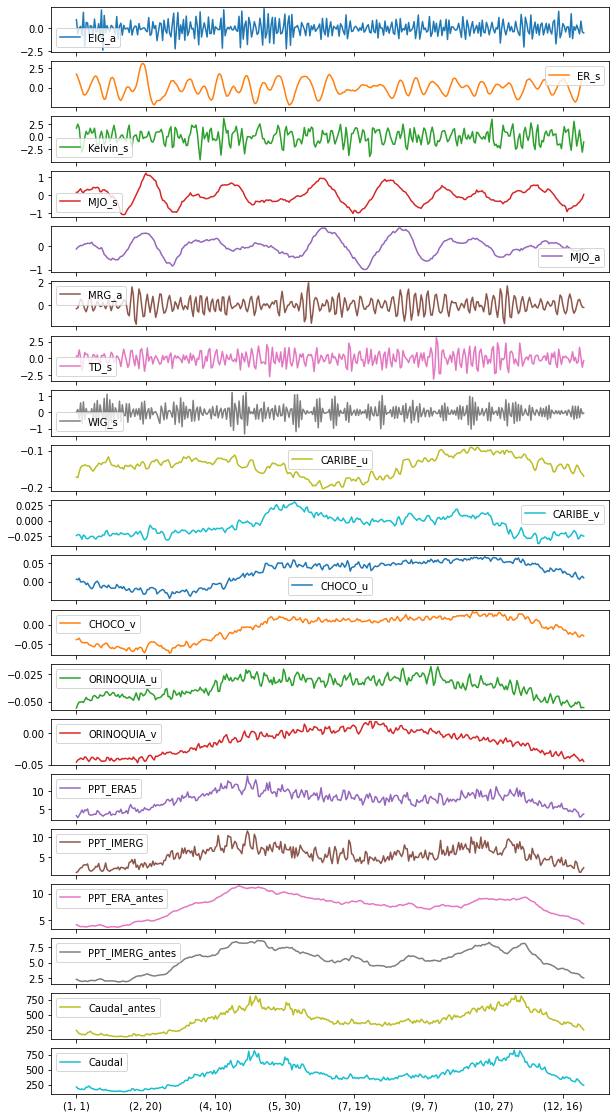

In [7]:
media_climatologica.plot(subplots=True, figsize=(10,20))

In [8]:
std_climatologica = datos.groupby([datos.index.month, datos.index.day]).std()
# arreglar el 29 de febrero
std_climatologica.loc[2, 29, :] = (std_climatologica.loc[2, 28, :].values+std_climatologica.loc[3, 1, :].values)/2

In [9]:
std_climatologica.to_csv(ruta_datos+'Std_clima_datos.csv')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

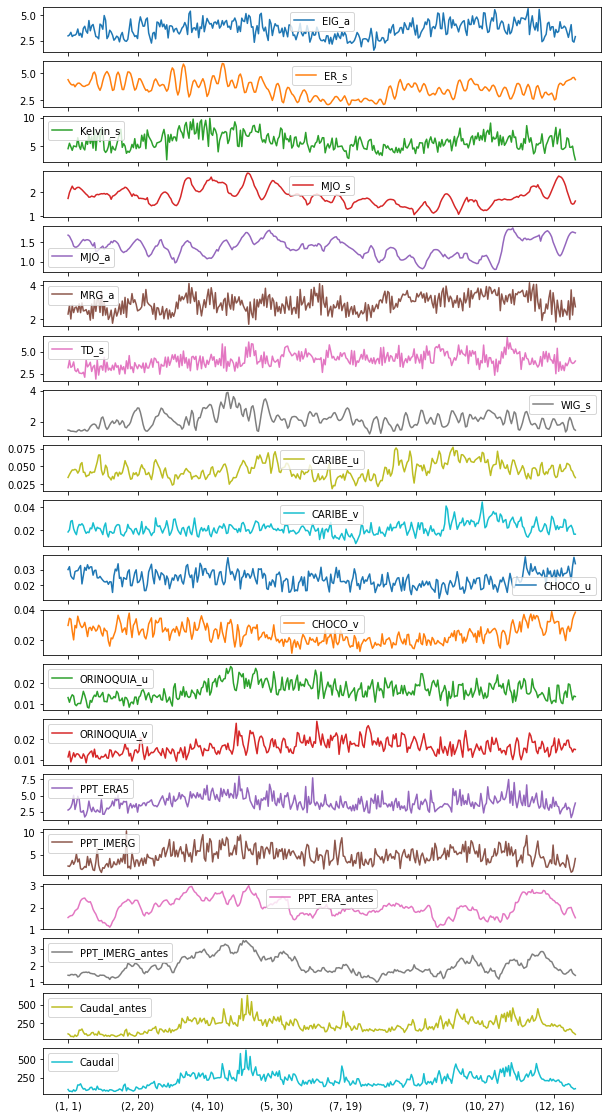

In [10]:
std_climatologica.plot(subplots=True, figsize=(10,20))

### Anomalíás estandarizadas

In [11]:
def Estandarizar_serie(serie, media, std):
    
    serie_anom = serie.copy()
    
    for index in media_climatologica.index.to_numpy():
        
        serie_anom[(serie_anom.index.month==index[0])&(serie_anom.index.day==index[1])] = \
        (serie_anom[(serie_anom.index.month==index[0])&(serie_anom.index.day==index[1])] - media[index[0],index[1]])/std[index[0],index[1]]
        
    return serie_anom


def Estandarizar_df(df, media_df, std_df, skip=0):
    
    df_anom = df.copy()
    
    for column in df.columns[skip:]:
        
        df_anom[column] = Estandarizar_serie(df_anom[column], media_df[column], std_df[column])
        
    return df_anom
        

In [13]:
Anomalias = Estandarizar_df(datos, media_climatologica, std_climatologica, skip=8)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

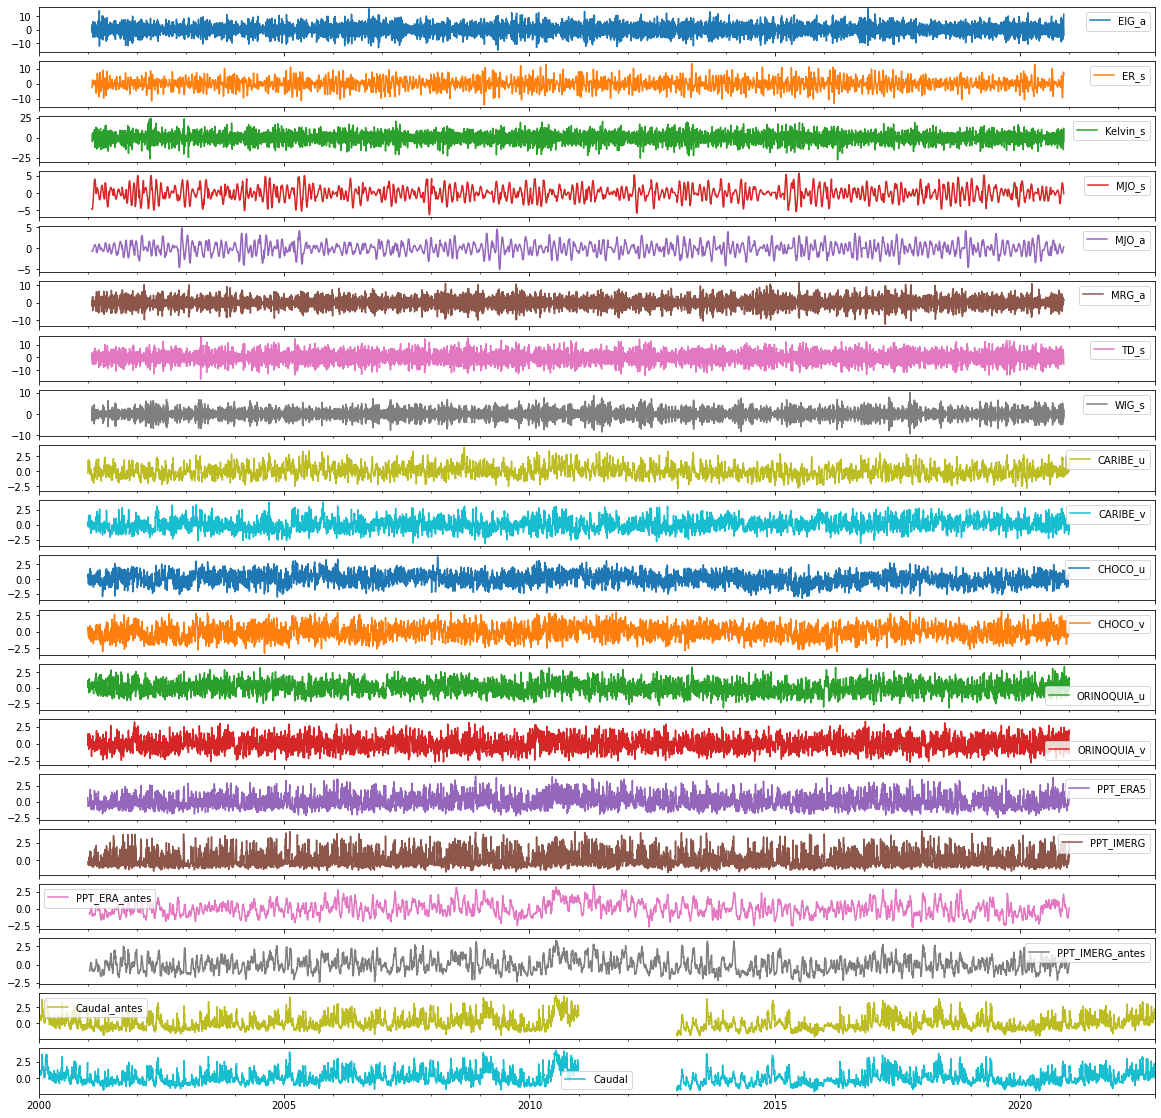

In [14]:
Anomalias.plot(subplots=True, figsize=(20,20))

array([[<AxesSubplot:xlabel='EIG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ER_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='Kelvin_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MRG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='TD_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='WIG_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CARIBE_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CARIBE_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CHOCO_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CHOCO_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ORINOQUIA_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ORINOQUIA_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_ERA5', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_ERA_antes', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_IMERG_antes

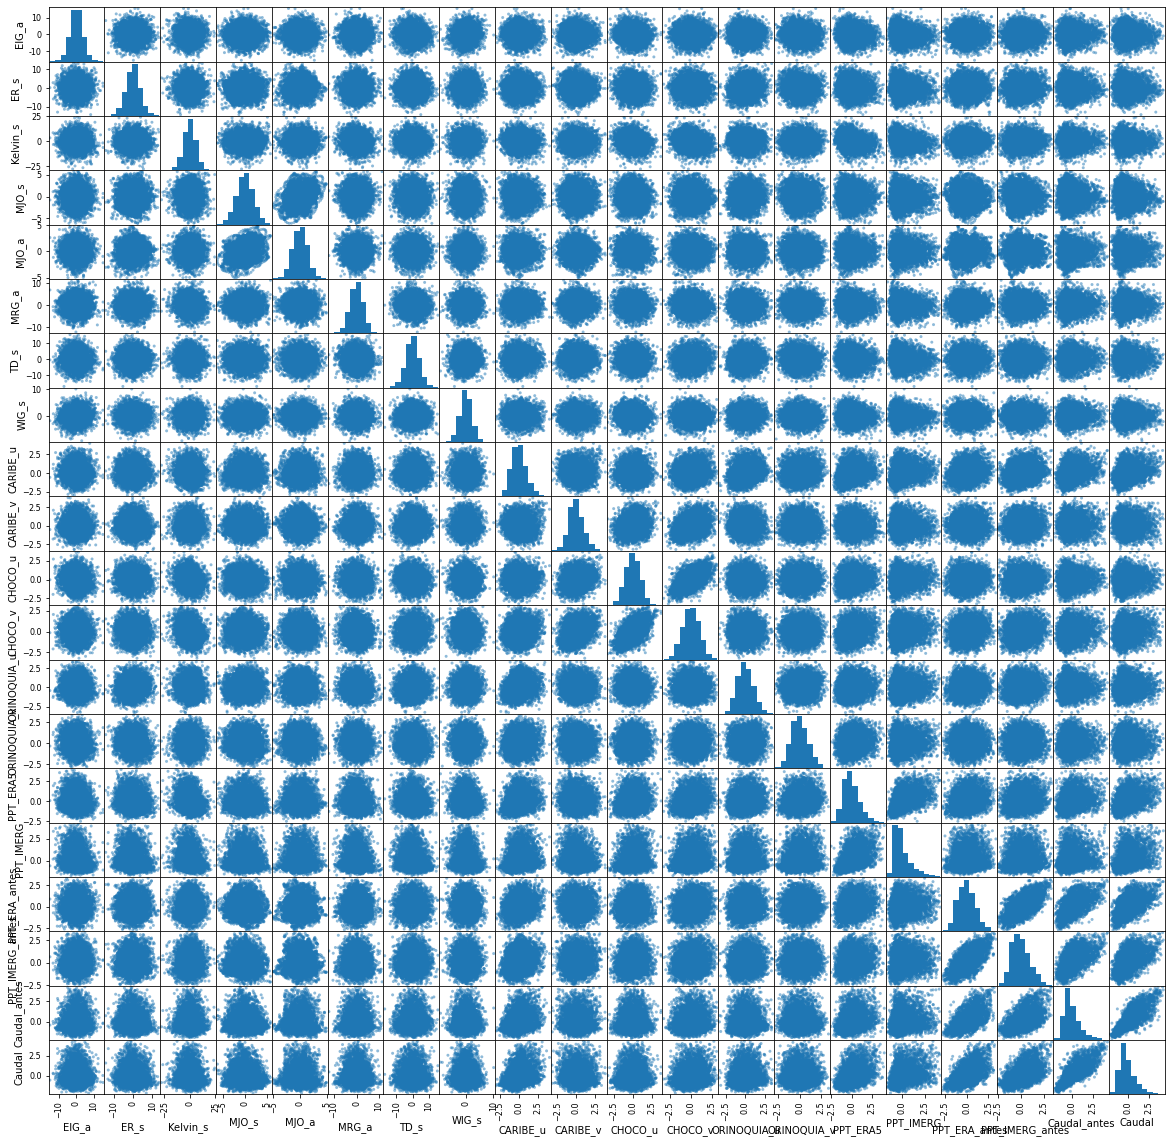

In [15]:
pd.plotting.scatter_matrix(Anomalias, figsize=(20,20))

<AxesSubplot:>

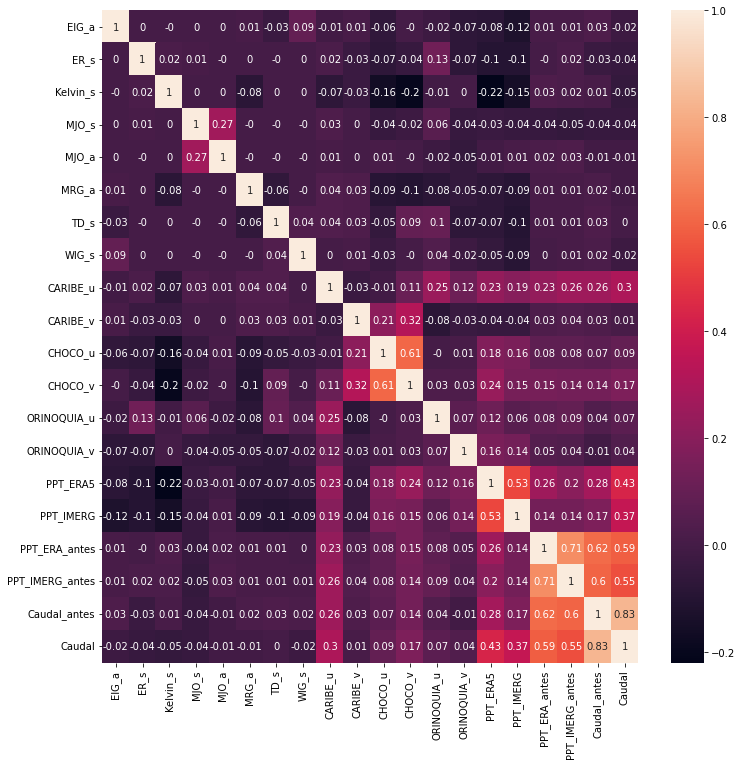

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(Anomalias.corr().round(2), annot=True)

In [19]:
Anomalias.to_csv(ruta_datos+'Anomalias_datos.csv')

### Algunas conclusiones 

Por el momento, se podría utilizar las siguientes variables para pronosticar:

* Caudal antecedente
* Precipitación antecedente de ERA5
* Precipitación del día de ERA5
* Chorro del caribe zonal (u)
* Chorro del chocó meridional (v)